In [1]:
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay  # Importar Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotl.
import requests # Import requests library to make HTTP requests in Python easily.
import pandas as pd
from scipy.spatial.distance import pdist, squareform 
from sklearn.decomposition import PCA
from scipy.spatial import KDTree

In [75]:
#Me ayuda a ver que contiene cada archivo
import pandas as pd
import os

def mostrar_contenido_csv(ruta_directorio):
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]
    for archivo_csv in archivos_csv:
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        df = pd.read_csv(ruta_completa, header=None)
        print(f'Contenido de {archivo_csv}:')
        print(df)
        print("\n" + "="*50 + "\n")


In [3]:
mostrar_contenido_csv("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv")


Contenido de -3_0_0.csv:
        0  1    2    3  4
0       2  B  119   82  0
1       4  B  120   82  0
2       4  B  121   82  0
3       4  B  122   82  0
4       4  B  123   82  0
...   ... ..  ...  ... ..
8524  161  A  139  182  0
8525  164  B  140  182  0
8526  164  B  141  182  0
8527  164  B  142  182  0
8528  164  B  143  182  0

[8529 rows x 5 columns]


Contenido de 9_0_0.csv:
        0  1    2    3  4
0      11  A  124   82  0
1       4  B  125   82  0
2       4  B  126   82  0
3       5  A  127   82  0
4       5  A  128   82  0
...   ... ..  ...  ... ..
8107  159  A  122  182  0
8108  159  A  123  182  0
8109  159  A  124  182  0
8110  159  A  125  182  0
8111  163  A  137  182  0

[8112 rows x 5 columns]


Contenido de -1_0_0.csv:
        0  1    2    3  4
0       1  B  115   83  0
1       1  B  116   83  0
2       1  B  117   83  0
3       1  B  118   83  0
4       9  B  119   83  0
...   ... ..  ...  ... ..
8232  160  B  123  182  0
8233  160  B  124  182  0
8234  160  B  

In [104]:
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    
    def calcular_y_guardar_centroides(ruta_directorio):
        # Crear carpeta para guardar los centroides si no existe
        carpeta_centroides = os.path.join(ruta_directorio, "centroides")
        if not os.path.exists(carpeta_centroides):
            os.makedirs(carpeta_centroides)
    
        # Obtener una lista de todos los archivos CSV en la ruta especificada
        archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]
    
        # Iterar sobre cada archivo CSV
        for archivo_csv in archivos_csv:
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(ruta_directorio, archivo_csv)
            
            # Leer el archivo CSV y asignar nombres de columnas
            df = pd.read_csv(ruta_completa, header=None)
            nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
            df.columns = nombres_columnas
            
            # Agrupar los datos por el ID y el Tipo
            grupos = df.groupby(['id', 'Tipo'])
            
            # Inicializar listas para almacenar los centroides y tipos
            centroides_x = []
            centroides_y = []
            tipos_centroides = []
            
            # Calcular el centroide y el tipo para cada grupo
            for (id_grupo, tipo_grupo), grupo in grupos:
                X_grupo = grupo['X']
                Y_grupo = grupo['Y']
                centroid_x_grupo = X_grupo.mean()
                centroid_y_grupo = Y_grupo.mean()
                centroides_x.append(centroid_x_grupo)
                centroides_y.append(centroid_y_grupo)
                tipos_centroides.append(tipo_grupo)  # Guardar el tipo del grupo
            
            # Crear un DataFrame para almacenar los centroides
            df_centroides = pd.DataFrame({"centroides_x": centroides_x, "centroides_y": centroides_y, "id": tipos_centroides})
            
            # Guardar el DataFrame como CSV en la carpeta de centroides
            nombre_archivo_centroides = os.path.splitext(archivo_csv)[0] + ".csv"
            ruta_archivo_centroides = os.path.join(carpeta_centroides, nombre_archivo_centroides)
            df_centroides.to_csv(ruta_archivo_centroides, index=False)
            
            # Crear el gráfico de dispersión con centroides rojos y azules
            for tipo in set(tipos_centroides):
                color = 'b' if tipo == 'A' else 'r'  # Rojo para tipo 'A', azul para tipo 'B'
                indices_tipo = [i for i, t in enumerate(tipos_centroides) if t == tipo]
                centroides_x_tipo = [centroides_x[i] for i in indices_tipo]
                centroides_y_tipo = [centroides_y[i] for i in indices_tipo]
                plt.scatter(centroides_x_tipo, centroides_y_tipo, color=color, label=f'Tipo {tipo}')
            
            plt.xlabel('Coordenada X')
            plt.ylabel('Coordenada Y')
            plt.title(f'Centroides por Tipo ({archivo_csv})')
            plt.legend()
            
            # Guardar la imagen del gráfico en la carpeta de centroides
            ruta_imagen = os.path.join(carpeta_centroides, os.path.splitext(archivo_csv)[0] + "_centroides.png")
            plt.savefig(ruta_imagen)
            plt.close()  # Cerrar el gráfico para no sobrecargar la memoria
    
            print(f"Centroides y gráfico guardados para {archivo_csv} en {carpeta_centroides}.")

        return carpeta_centroides 


In [105]:
calcular_y_guardar_centroides("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv")

Centroides y gráfico guardados para -3_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides.
Centroides y gráfico guardados para 9_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides.
Centroides y gráfico guardados para -1_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides.
Centroides y gráfico guardados para -5_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides.
Centroides y gráfico guardados para 3_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides.
Centroides y gráfico guardados para 5_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides.
Centroides y gráfico guardados para -9_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides.
Ce

'/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides'

In [169]:
def calcular_rips_y_persistencia(ruta_centroides):
    # Crear la carpeta para guardar los diagramas de persistencia si no existe
    ruta_persistencia = os.path.join(ruta_centroides, "persistencia")
    if not os.path.exists(ruta_persistencia):
        os.makedirs(ruta_persistencia)

    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_centroides) if archivo.endswith('.csv')]

    # Iterar sobre cada archivo de centroides
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_centroides, archivo_csv)
        
        # Leer el archivo CSV
        df = pd.read_csv(ruta_completa)
        
        # Extraer las coordenadas de los centroides
        centroides_x = df['centroides_x'].tolist()
        centroides_y = df['centroides_y'].tolist()
        
        # Convertir las coordenadas de los centroides a un formato adecuado para Gudhi
        puntos = np.array(list(zip(centroides_x, centroides_y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

        # Visualizar el complejo de Rips y el diagrama de persistencia
        plt.figure(figsize=(12, 5))

        # Subplot 1: Complejo de Rips
        plt.subplot(1, 2, 1)
        plt.scatter(centroides_x, centroides_y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas (simplexes de dimensión 1)
                arista = simplex[0]
                x = [centroides_x[i] for i in arista]
                y = [centroides_y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips ({archivo_csv})')
        plt.legend()

        # Guardar la imagen del complejo de Rips
        nombre_imagen_rips = f"{os.path.splitext(archivo_csv)[0]}_complejo_rips.png"
        ruta_imagen_rips = os.path.join(ruta_persistencia, nombre_imagen_rips)
        plt.tight_layout()
        plt.savefig(ruta_imagen_rips)
        plt.close()  # Cerrar el gráfico para no sobrecargar la memoria

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Corregir la estructura de los datos de persistencia para el DataFrame
        persistencia_aplanada = []
        for d in diag:
            dimension, (birth, death) = d
            persistencia_aplanada.append([dimension, birth, death])

        # Guardar los datos de persistencia en un DataFrame
        diagram_df = pd.DataFrame(persistencia_aplanada, columns=['dimension', 'birth', 'death'])

        # Filtrar solo para las dimensiones 0 y 1 (si aplica)
        diagram_df = diagram_df[diagram_df['dimension'] <= 1]

        # Guardar el diagrama de persistencia en formato CSV para futuras comparaciones
        nombre_diagrama_csv = f"{os.path.splitext(archivo_csv)[0]}.csv"
        ruta_diagrama_csv = os.path.join(ruta_persistencia, nombre_diagrama_csv)
        diagram_df.to_csv(ruta_diagrama_csv, index=False)

        # Subplot 2: Diagrama de Persistencia
        plt.figure(figsize=(6, 6))  # Gráfico más pequeño para el diagrama
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        # Guardar la imagen del diagrama de persistencia
        nombre_imagen_persistencia = f"{os.path.splitext(archivo_csv)[0]}_diagrama_persistencia.png"
        ruta_imagen_persistencia = os.path.join(ruta_persistencia, nombre_imagen_persistencia)
        plt.tight_layout()
        plt.savefig(ruta_imagen_persistencia)
        plt.close()  # Cerrar el gráfico para no sobrecargar la memoria

        print(f'Gráfico del Complejo de Rips guardado como {nombre_imagen_rips} y Diagrama de Persistencia guardado como {nombre_imagen_persistencia} en {ruta_persistencia}.')

    return ruta_persistencia


In [170]:
calcular_rips_y_persistencia("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides")

Gráfico del Complejo de Rips guardado como -3_0_0_complejo_rips.png y Diagrama de Persistencia guardado como -3_0_0_diagrama_persistencia.png en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia.
Gráfico del Complejo de Rips guardado como 9_0_0_complejo_rips.png y Diagrama de Persistencia guardado como 9_0_0_diagrama_persistencia.png en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia.
Gráfico del Complejo de Rips guardado como -1_0_0_complejo_rips.png y Diagrama de Persistencia guardado como -1_0_0_diagrama_persistencia.png en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia.
Gráfico del Complejo de Rips guardado como -5_0_0_complejo_rips.png y Diagrama de Persistencia guardado como -5_0_0_diagrama_persistencia.png en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia

'/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia'

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [61]:
import os
import pandas as pd
import numpy as np
import gudhi as gd

def calcular_distancia_bottleneck(ruta_directorio):
    # Crear la carpeta de salida
    carpeta_salida = os.path.join(ruta_directorio, "distancia de cuello de botella")
    os.makedirs(carpeta_salida, exist_ok=True)

    # Almacenar los diagramas de persistencia
    diagramas_persistencia = {}
    diagramas_persistencia_0 = {}

    # Listar todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        try:
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(ruta_directorio, archivo_csv)
            
            # Leer el archivo CSV y asignar nombres de columnas
            df = pd.read_csv(ruta_completa, header=0)  # Usar la primera fila como cabecera
            
            # Asegúrate de que el DataFrame tenga las columnas correctas
            if 'birth' not in df.columns or 'death' not in df.columns:
                print(f"El archivo {archivo_csv} no contiene las columnas 'birth' o 'death'.")
                continue
            
            # Convertir columnas 'birth' y 'death' a flotantes
            df['birth'] = df['birth'].astype(float)
            df['death'] = df['death'].astype(float)

            # Almacenar el diagrama de persistencia en dimensión 1
            diag_1 = df[df['dimension'] == 1][['birth', 'death']].to_numpy()
            diagramas_persistencia[archivo_csv] = diag_1
            
            # Almacenar el diagrama de persistencia en dimensión 0
            diag_0 = df[df['dimension'] == 0][['birth', 'death']].to_numpy()
            diagramas_persistencia_0[archivo_csv] = diag_0
            
        except Exception as e:
            print(f"Error al procesar el archivo {archivo_csv}: {e}")

    # Calcular las distancias de Bottleneck entre todos los pares de diagramas de persistencia
    archivos = list(diagramas_persistencia.keys())
    n = len(archivos)
    tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

    # Inicializar matrices de distancias
    distancias_dim1 = np.zeros((n, n))
    distancias_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[archivo_i]
            diag_j = diagramas_persistencia[archivo_j]
            diag_i_0 = diagramas_persistencia_0[archivo_i]
            diag_j_0 = diagramas_persistencia_0[archivo_j]
            
            # Calcular distancias de Bottleneck
            distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
            distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)
            
            distancias_dim1[i, j] = distancia_bottleneck
            distancias_dim1[j, i] = distancia_bottleneck
            distancias_dim0[i, j] = distancia_bottleneck_0
            distancias_dim0[j, i] = distancia_bottleneck_0
            
            # Verificar que la distancia de Bottleneck para el mismo archivo es efectivamente cero
            if i == j:
                if distancia_bottleneck < tolerancia:
                    print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} es efectivamente cero.")
                else:
                    print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} no es cero: {distancia_bottleneck}")
                
                if distancia_bottleneck_0 < tolerancia:
                    print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} es efectivamente cero.")
                else:
                    print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} no es cero: {distancia_bottleneck_0}")

    # Guardar las matrices de distancias en CSV
    pd.DataFrame(distancias_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_bottleneck_dim1.csv'))
    pd.DataFrame(distancias_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_bottleneck_dim0.csv'))


In [62]:

calcular_distancia_bottleneck('/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia')


Distancia de Bottleneck (Dimensión 1) para -3_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -3_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 9_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 9_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -1_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -1_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -5_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -5_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 3_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 3_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 5_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 5_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -9_0_0.csv es efectivamente cero.
Dista

In [67]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import gudhi.wasserstein as gw

def calcular_distancia_wasserstein(ruta_directorio):
    # Crear la carpeta de salida
    carpeta_salida = os.path.join(ruta_directorio, "distancia de wasserstein")
    os.makedirs(carpeta_salida, exist_ok=True)

    # Almacenar los diagramas de persistencia
    diagramas_persistencia = {}
    diagramas_persistencia_0 = {}

    # Listar todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        try:
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(ruta_directorio, archivo_csv)
            
            # Leer el archivo CSV y asignar nombres de columnas
            df = pd.read_csv(ruta_completa, header=0)  # Usar la primera fila como cabecera
            
            # Asegúrate de que el DataFrame tenga las columnas correctas
            if 'birth' not in df.columns or 'death' not in df.columns:
                print(f"El archivo {archivo_csv} no contiene las columnas 'birth' o 'death'.")
                continue
            
            # Convertir columnas 'birth' y 'death' a flotantes
            df['birth'] = df['birth'].astype(float)
            df['death'] = df['death'].astype(float)

            # Almacenar el diagrama de persistencia en dimensión 1
            diag_1 = df[df['dimension'] == 1][['birth', 'death']].to_numpy()
            diagramas_persistencia[archivo_csv] = diag_1
            
            # Almacenar el diagrama de persistencia en dimensión 0
            diag_0 = df[df['dimension'] == 0][['birth', 'death']].to_numpy()
            diagramas_persistencia_0[archivo_csv] = diag_0
            
        except Exception as e:
            print(f"Error al procesar el archivo {archivo_csv}: {e}")

    # Calcular las distancias de Wasserstein entre todos los pares de diagramas de persistencia
    archivos = list(diagramas_persistencia.keys())
    n = len(archivos)
    tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

    # Inicializar matrices de distancias
    distancias_dim1 = np.zeros((n, n))
    distancias_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[archivo_i]
            diag_j = diagramas_persistencia[archivo_j]
            diag_i_0 = diagramas_persistencia_0[archivo_i]
            diag_j_0 = diagramas_persistencia_0[archivo_j]
            
            # Calcular distancias de Wasserstein
            distancia_wasserstein = gw.wasserstein_distance(diag_i, diag_j, order=1)
            distancia_wasserstein_0 = gw.wasserstein_distance(diag_i_0, diag_j_0, order=1)
            
            distancias_dim1[i, j] = distancia_wasserstein
            distancias_dim1[j, i] = distancia_wasserstein
            distancias_dim0[i, j] = distancia_wasserstein_0
            distancias_dim0[j, i] = distancia_wasserstein_0
            
            # Verificar que la distancia de Wasserstein para el mismo archivo es efectivamente cero
            if i == j:
                if distancia_wasserstein < tolerancia:
                    print(f"Distancia de Wasserstein (Dimensión 1) para {archivo_i} es efectivamente cero.")
                else:
                    print(f"Distancia de Wasserstein (Dimensión 1) para {archivo_i} no es cero: {distancia_wasserstein}")
                
                if distancia_wasserstein_0 < tolerancia:
                    print(f"Distancia de Wasserstein (Dimensión 0) para {archivo_i} es efectivamente cero.")
                else:
                    print(f"Distancia de Wasserstein (Dimensión 0) para {archivo_i} no es cero: {distancia_wasserstein_0}")

    # Guardar las matrices de distancias en CSV
    pd.DataFrame(distancias_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_wasserstein_dim1.csv'))
    pd.DataFrame(distancias_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_wasserstein_dim0.csv'))

In [68]:
calcular_distancia_wasserstein('/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia')


Distancia de Wasserstein (Dimensión 1) para -3_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para -3_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 9_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 9_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para -1_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para -1_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para -5_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para -5_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 3_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 3_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 5_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 5_0_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para -9_0_0.csv es efectivament

In [116]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import gudhi.wasserstein as gw

def distancias(ruta_directorio):
    # Crear la carpeta de salida
    carpeta_salida = os.path.join(ruta_directorio, "distancias")
    os.makedirs(carpeta_salida, exist_ok=True)

    # Almacenar los diagramas de persistencia
    diagramas_persistencia = {}
    diagramas_persistencia_0 = {}

    # Listar todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        try:
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(ruta_directorio, archivo_csv)
            
            # Leer el archivo CSV y asignar nombres de columnas
            df = pd.read_csv(ruta_completa, header=0)  # Usar la primera fila como cabecera
            
            # Asegúrate de que el DataFrame tenga las columnas correctas
            if 'birth' not in df.columns or 'death' not in df.columns:
                print(f"El archivo {archivo_csv} no contiene las columnas 'birth' o 'death'.")
                continue
            
            # Convertir columnas 'birth' y 'death' a flotantes
            df['birth'] = df['birth'].astype(float)
            df['death'] = df['death'].astype(float)

            # Almacenar el diagrama de persistencia en dimensión 1
            diag_1 = df[df['dimension'] == 1][['birth', 'death']].to_numpy()
            diagramas_persistencia[archivo_csv] = diag_1
            
            # Almacenar el diagrama de persistencia en dimensión 0
            diag_0 = df[df['dimension'] == 0][['birth', 'death']].to_numpy()
            diagramas_persistencia_0[archivo_csv] = diag_0
            
        except Exception as e:
            print(f"Error al procesar el archivo {archivo_csv}: {e}")

    # Calcular las distancias entre todos los pares de diagramas de persistencia
    archivos = list(diagramas_persistencia.keys())
    n = len(archivos)
    tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

    # Inicializar matrices de distancias
    distancias_bottleneck_dim1 = np.zeros((n, n))
    distancias_bottleneck_dim0 = np.zeros((n, n))
    distancias_wasserstein_dim1 = np.zeros((n, n))
    distancias_wasserstein_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[archivo_i]
            diag_j = diagramas_persistencia[archivo_j]
            diag_i_0 = diagramas_persistencia_0[archivo_i]
            diag_j_0 = diagramas_persistencia_0[archivo_j]
            
            # Calcular distancias de Bottleneck
            distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
            distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)
            
            # Calcular distancias de Wasserstein
            distancia_wasserstein = gw.wasserstein_distance(diag_i, diag_j, order=1)
            distancia_wasserstein_0 = gw.wasserstein_distance(diag_i_0, diag_j_0, order=1)
            
            # Almacenar las distancias en las matrices
            distancias_bottleneck_dim1[i, j] = distancias_bottleneck_dim1[j, i] = distancia_bottleneck
            distancias_bottleneck_dim0[i, j] = distancias_bottleneck_dim0[j, i] = distancia_bottleneck_0
            distancias_wasserstein_dim1[i, j] = distancias_wasserstein_dim1[j, i] = distancia_wasserstein
            distancias_wasserstein_dim0[i, j] = distancias_wasserstein_dim0[j, i] = distancia_wasserstein_0
            
            # Verificar que las distancias para el mismo archivo son efectivamente cero
            if i == j:
                if distancia_bottleneck < tolerancia and distancia_wasserstein < tolerancia:
                    print(f"Distancias (Dimensión 1) para {archivo_i} son efectivamente cero.")
                else:
                    print(f"Distancias (Dimensión 1) para {archivo_i} no son cero: Bottleneck = {distancia_bottleneck}, Wasserstein = {distancia_wasserstein}")
                
                if distancia_bottleneck_0 < tolerancia and distancia_wasserstein_0 < tolerancia:
                    print(f"Distancias (Dimensión 0) para {archivo_i} son efectivamente cero.")
                else:
                    print(f"Distancias (Dimensión 0) para {archivo_i} no son cero: Bottleneck = {distancia_bottleneck_0}, Wasserstein = {distancia_wasserstein_0}")

    # Guardar las matrices de distancias en CSV
    pd.DataFrame(distancias_bottleneck_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_bottleneck_dim1.csv'))
    pd.DataFrame(distancias_bottleneck_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_bottleneck_dim0.csv'))
    pd.DataFrame(distancias_wasserstein_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_wasserstein_dim1.csv'))
    pd.DataFrame(distancias_wasserstein_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_wasserstein_dim0.csv'))

    print("Los cálculos de distancias se han completado y guardado en la carpeta 'distancias'.")

    return carpeta_salida 

In [70]:
distancias('/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia')


Distancias (Dimensión 1) para -3_0_0.csv son efectivamente cero.
Distancias (Dimensión 0) para -3_0_0.csv son efectivamente cero.
Distancias (Dimensión 1) para 9_0_0.csv son efectivamente cero.
Distancias (Dimensión 0) para 9_0_0.csv son efectivamente cero.
Distancias (Dimensión 1) para -1_0_0.csv son efectivamente cero.
Distancias (Dimensión 0) para -1_0_0.csv son efectivamente cero.
Distancias (Dimensión 1) para -5_0_0.csv son efectivamente cero.
Distancias (Dimensión 0) para -5_0_0.csv son efectivamente cero.
Distancias (Dimensión 1) para 3_0_0.csv son efectivamente cero.
Distancias (Dimensión 0) para 3_0_0.csv son efectivamente cero.
Distancias (Dimensión 1) para 5_0_0.csv son efectivamente cero.
Distancias (Dimensión 0) para 5_0_0.csv son efectivamente cero.
Distancias (Dimensión 1) para -9_0_0.csv son efectivamente cero.
Distancias (Dimensión 0) para -9_0_0.csv son efectivamente cero.
Distancias (Dimensión 1) para 7_0_0.csv son efectivamente cero.
Distancias (Dimensión 0) para 7_

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def extract_levels(filename):
    parts = filename.replace('.csv', '').split('_')
    return [int(parts[0]), int(parts[1]), int(parts[2])]

def sort_filenames(filenames):
    return sorted(filenames, key=extract_levels)

def reorder_matrix(matrix, filenames):
    sorted_filenames = sort_filenames(filenames)
    indices = [filenames.index(name) for name in sorted_filenames]
    reordered_matrix = matrix[np.ix_(indices, indices)]
    return reordered_matrix, sorted_filenames

def plot_heatmap_and_clustermap(matrix, filenames, title, output_dir):
    reordered_matrix, sorted_filenames = reorder_matrix(matrix, filenames)
    
    # Heatmap
    plt.figure(figsize=(15, 12))
    sns.heatmap(reordered_matrix, 
                xticklabels=sorted_filenames, 
                yticklabels=sorted_filenames, 
                cmap='viridis', 
                annot=False,
                fmt=".2f", 
                cbar_kws={'label': 'Distancia'})
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f"Heatmap de {title}")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'heatmap_{title}.png'))
    plt.close()

    # Clustermap
    clustermap = sns.clustermap(reordered_matrix, 
                                xticklabels=sorted_filenames, 
                                yticklabels=sorted_filenames, 
                                cmap='viridis', 
                                annot=False,
                                fmt=".2f", 
                                figsize=(15, 12),
                                dendrogram_ratio=(.1, .2),
                                cbar_pos=(0, .2, .03, .4),
                                cbar_kws={'label': 'Distancia'})
    clustermap.ax_heatmap.set_xticklabels(
        clustermap.ax_heatmap.get_xticklabels(), 
        rotation=90, 
        fontsize=6)
    clustermap.ax_heatmap.set_yticklabels(
        clustermap.ax_heatmap.get_yticklabels(), 
        rotation=0, 
        fontsize=6)
    plt.title(f"Clustermap de {title}", pad=80)
    plt.savefig(os.path.join(output_dir, f'clustermap_{title}.png'))
    plt.close()

def crear_visualizaciones(ruta_directorio):
    carpeta_visualizacion = os.path.join(ruta_directorio, "visualizacion")
    os.makedirs(carpeta_visualizacion, exist_ok=True)

    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    for archivo in archivos_csv:
        nombre_base = os.path.splitext(archivo)[0]
        
        distancias = pd.read_csv(os.path.join(ruta_directorio, archivo), index_col=0)
        
        # Extraer los nombres de los archivos de las columnas
        filenames = list(distancias.columns)
        
        plot_heatmap_and_clustermap(distancias.values, filenames, nombre_base, carpeta_visualizacion)

    print("Las visualizaciones se han  guardado.")


In [5]:
# Llamar a la función
ruta_directorio = '/home/jupyter-user5/multicellularity_patterns_classification-/1-100/centroides/persistencia/distancias/'
crear_visualizaciones(ruta_directorio)

ValueError: invalid literal for int() with base 10: 'sim 0'

In [76]:
# Prueba con otro conjunto de datos

In [77]:
mostrar_contenido_csv("/home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/")

Contenido de 1_20_20.csv:
        0  1    2    3  4
0       3  A  128   83  0
1       3  A  129   83  0
2       3  A  130   83  0
3       5  A  131   83  0
4       5  A  132   83  0
...   ... ..  ...  ... ..
7275  159  B  112  182  0
7276  159  B  113  182  0
7277  159  B  114  182  0
7278  159  B  115  182  0
7279  159  B  116  182  0

[7280 rows x 5 columns]


Contenido de 2_2_2.csv:
        0  1    2    3  4
0       4  A  129   82  0
1       4  A  130   82  0
2       4  A  131   82  0
3       4  A  132   82  0
4       4  A  133   82  0
...   ... ..  ...  ... ..
7951  162  B  136  181  0
7952  162  B  137  181  0
7953  162  B  138  181  0
7954  162  B  139  181  0
7955  162  B  140  181  0

[7956 rows x 5 columns]


Contenido de -3_0_-3.csv:
        0  1    2    3  4
0      12  A  117   81  0
1      12  A  115   82  0
2       3  A  116   82  0
3      12  A  117   82  0
4       4  A  118   82  0
...   ... ..  ...  ... ..
8831  163  A  139  184  0
8832  163  A  140  184  0
8833  161  A

In [78]:
calcular_y_guardar_centroides("/home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/")

Centroides y gráfico guardados para 1_20_20.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides.
Centroides y gráfico guardados para 2_2_2.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides.
Centroides y gráfico guardados para -3_0_-3.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides.
Centroides y gráfico guardados para 20_1_1.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides.
Centroides y gráfico guardados para 10_10_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides.
Centroides y gráfico guardados para 20_20_1.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides.
Centroides y gráfico guardados para 0_10_6.csv en /home/jupyter-user5/multicellularity_patterns_c

Gráfico de Rips y diagrama de persistencia guardados para 1_20_20.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 2_2_2.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para -3_0_-3.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 20_1_1.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 10_10_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 20_20_1.csv en 

/opt/conda/envs/TDA/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:306: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(1, 1)
/opt/conda/envs/TDA/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Gráfico de Rips y diagrama de persistencia guardados para -1_-1_-1.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 1.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 2_0_2.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 8_18_2.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 0_-10_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 0_6_2.csv en /home/j

/opt/conda/envs/TDA/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


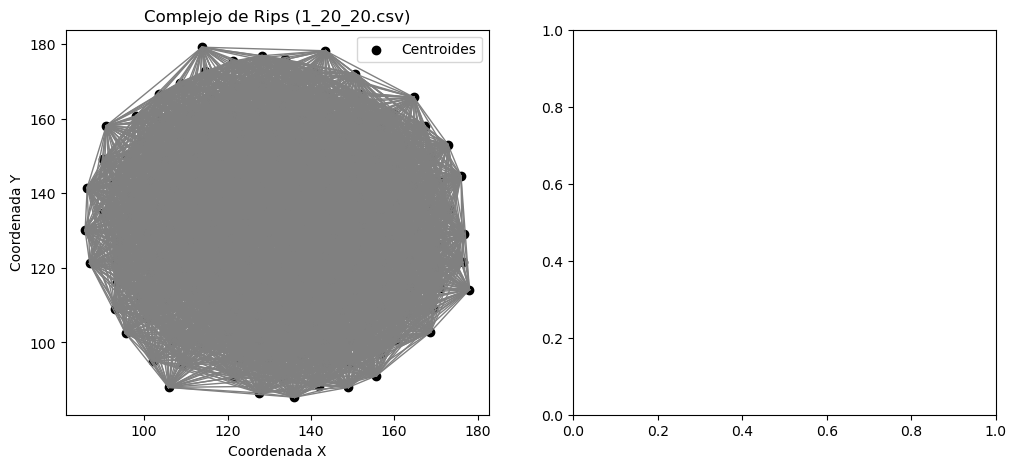

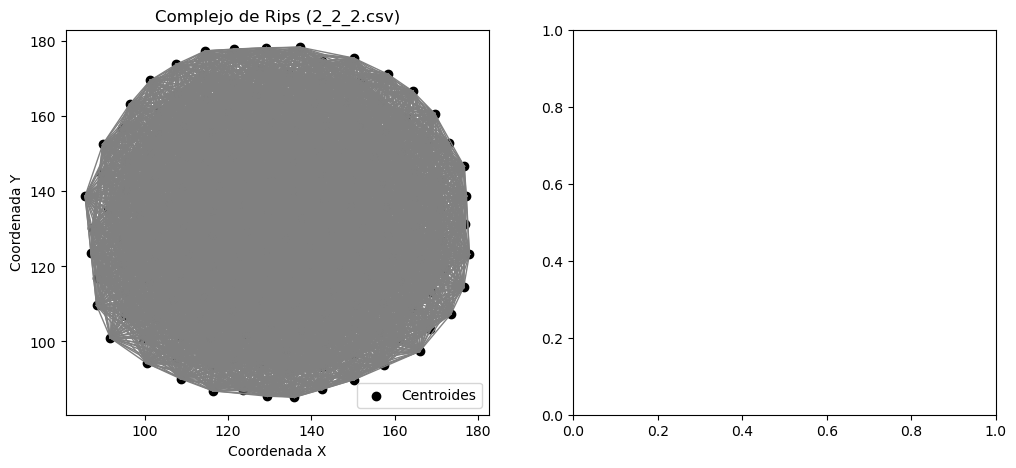

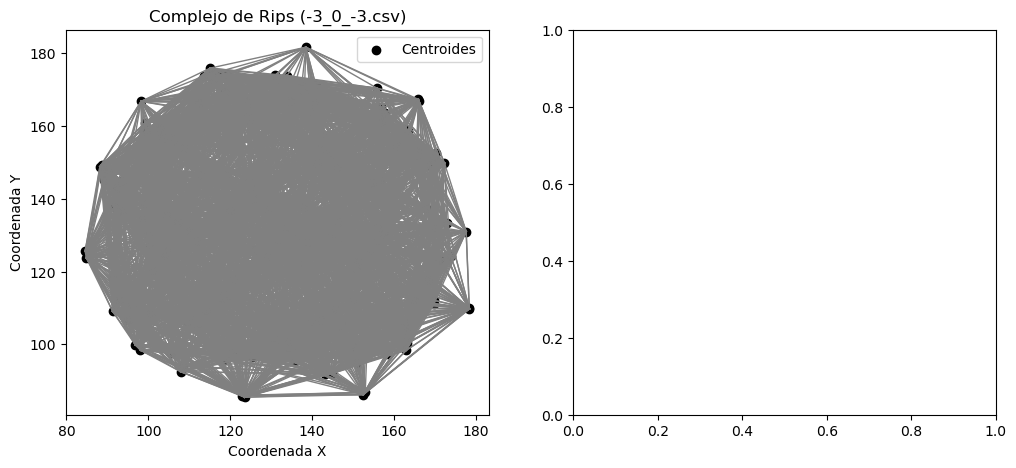

/opt/conda/envs/TDA/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


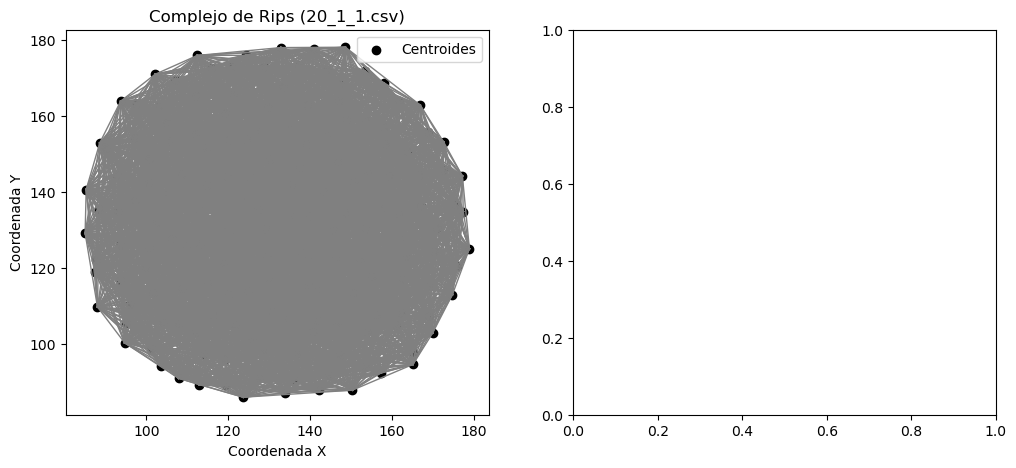

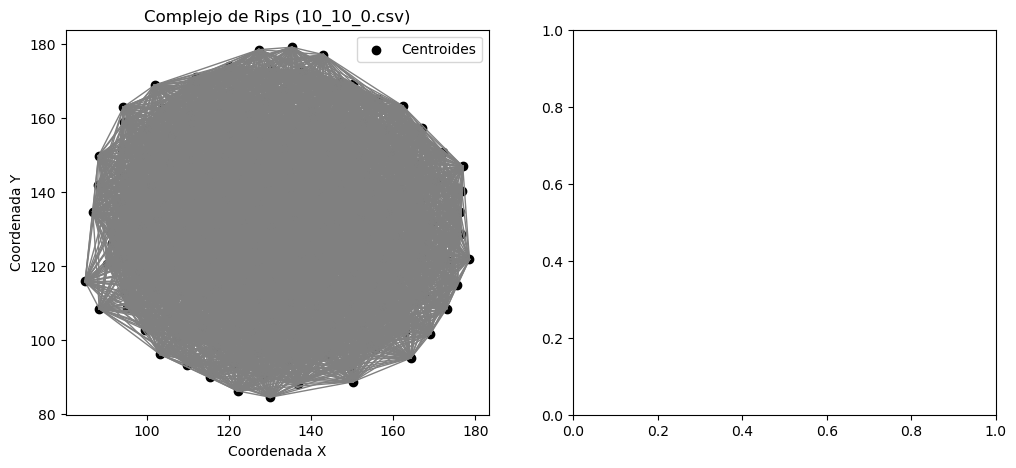

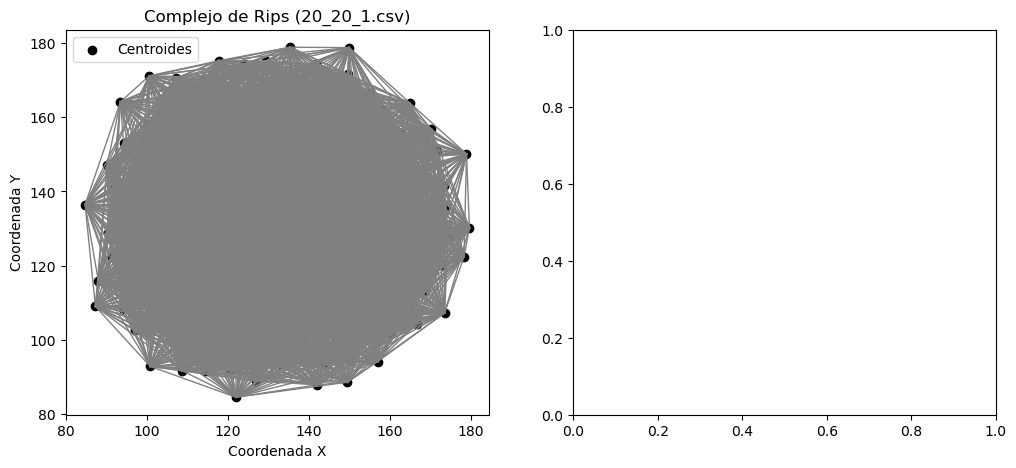

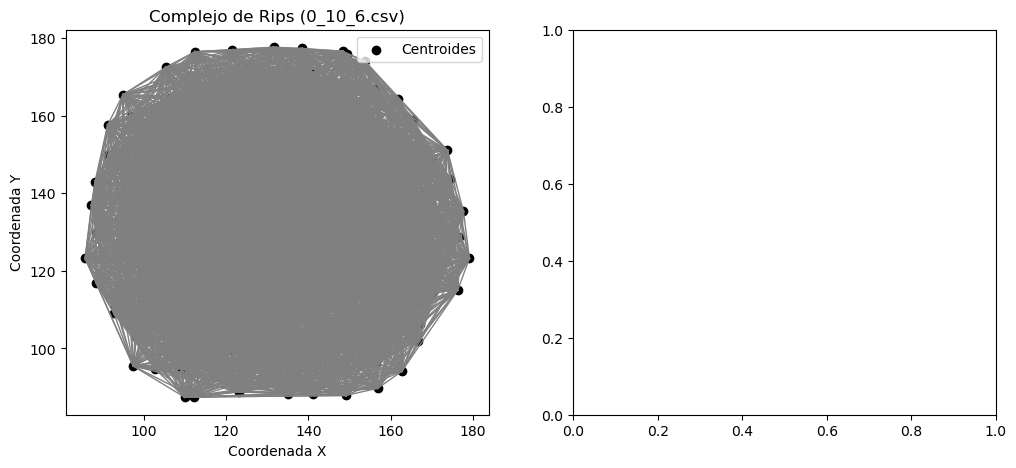

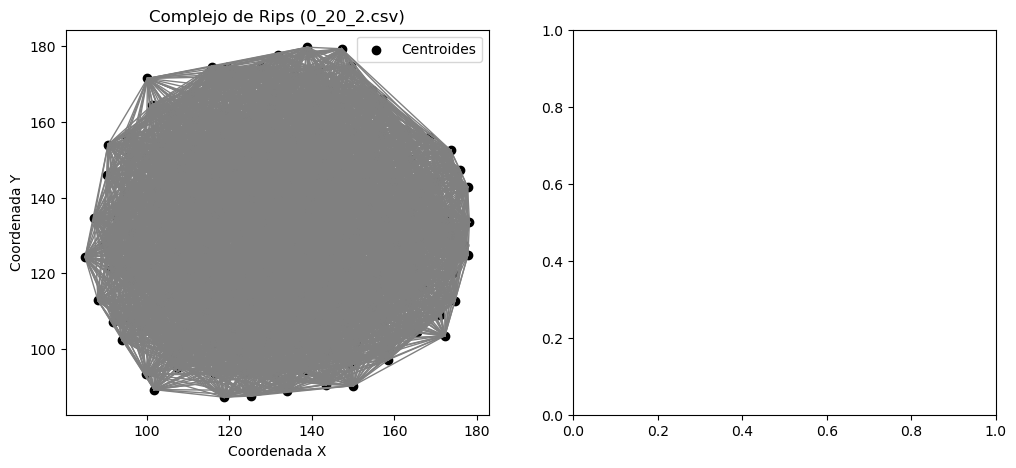

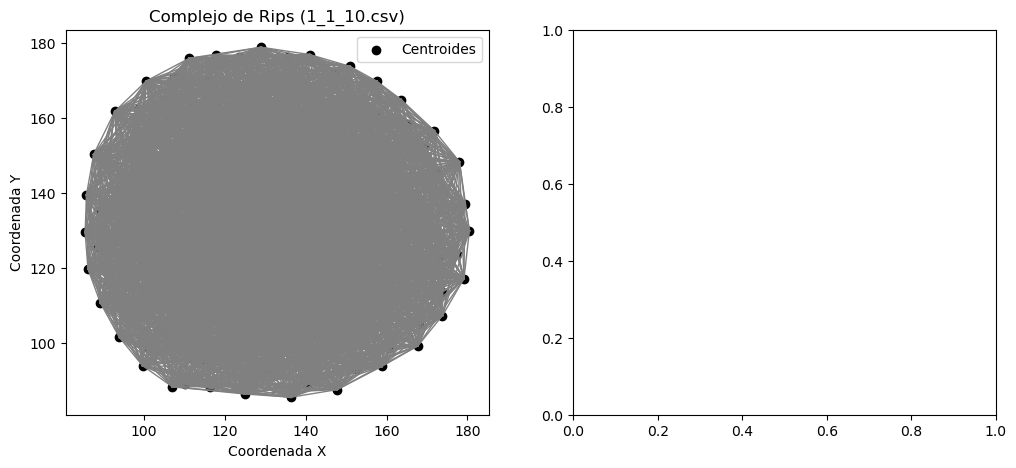

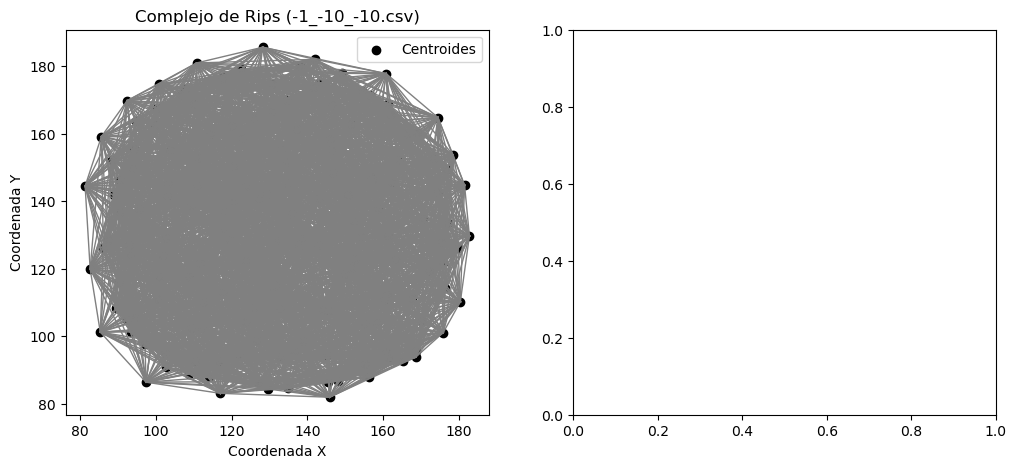

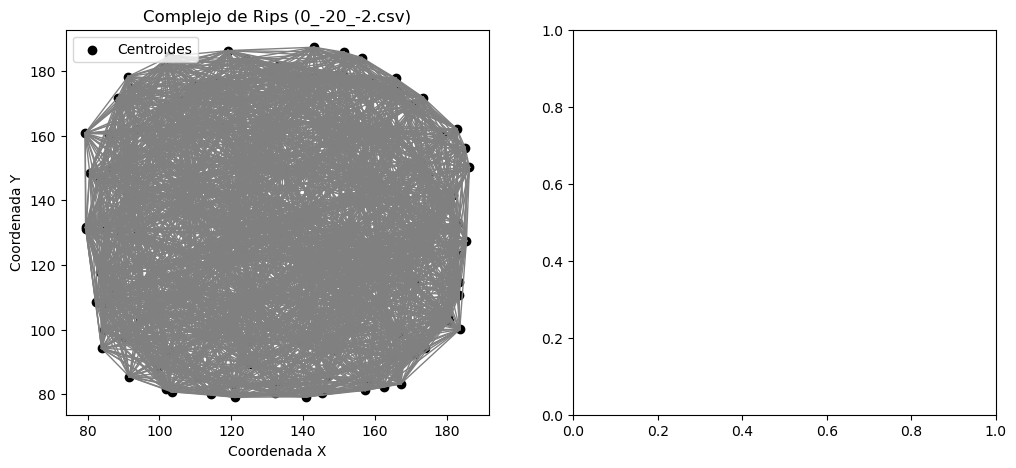

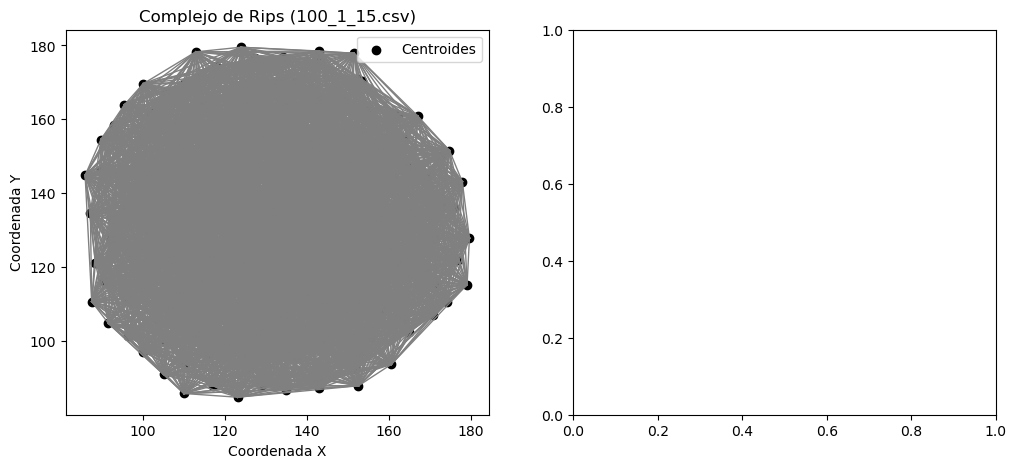

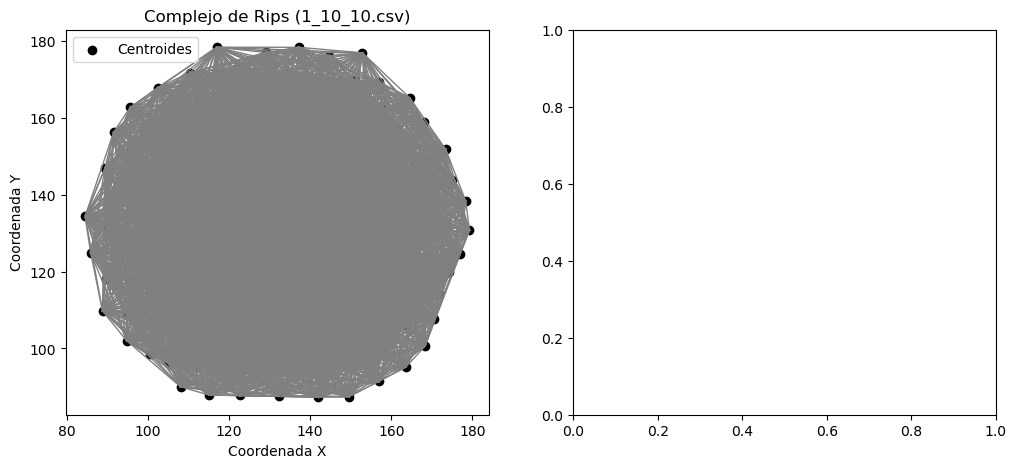

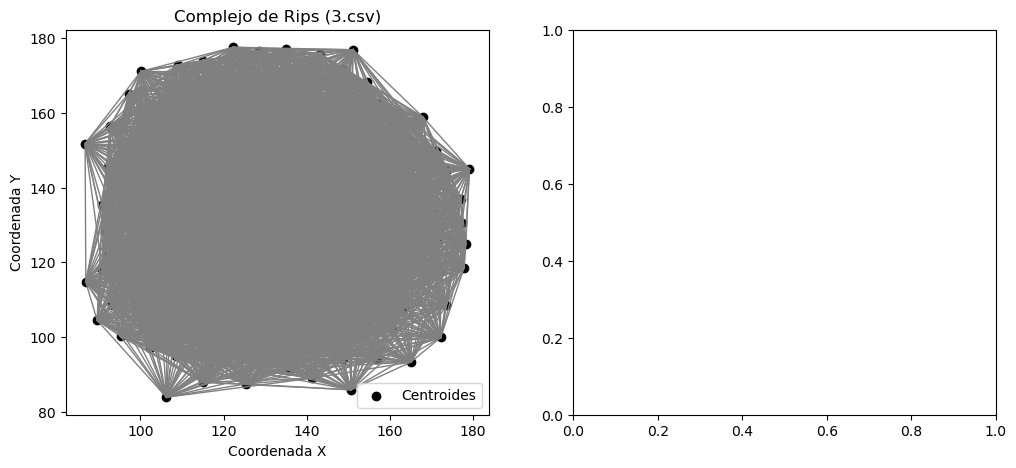

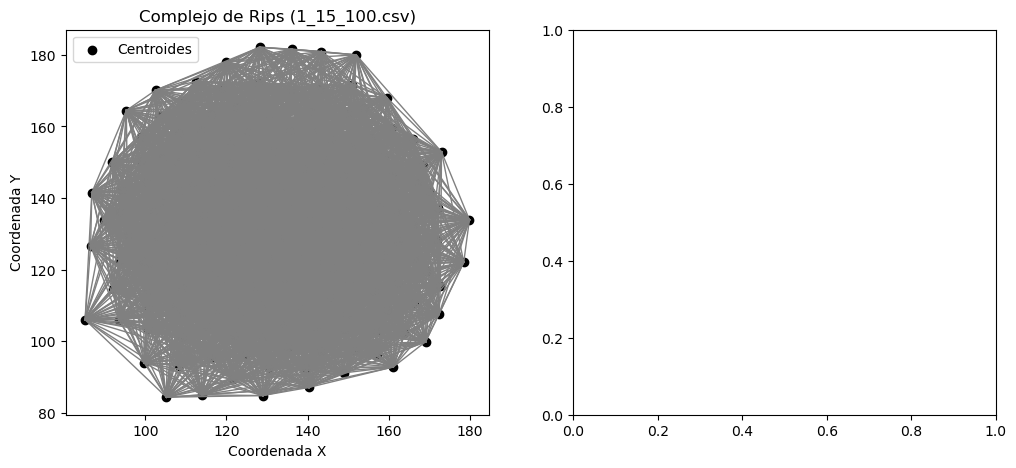

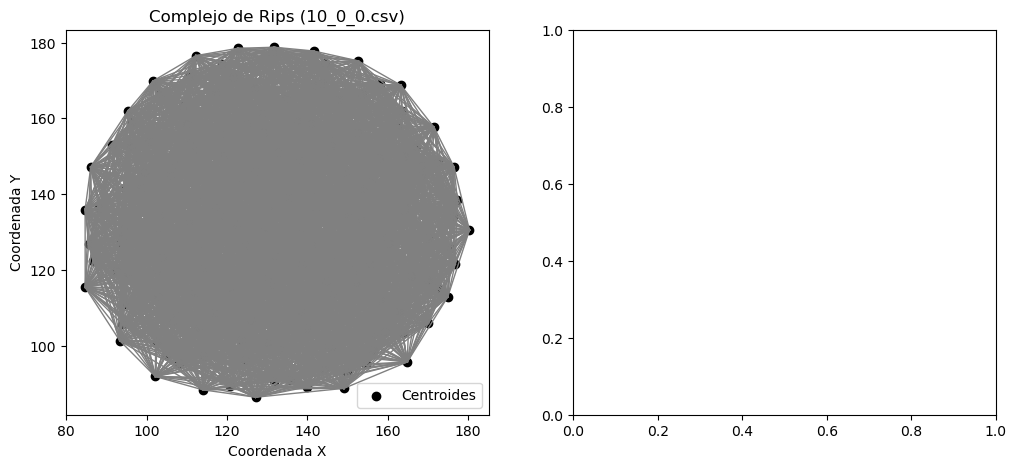

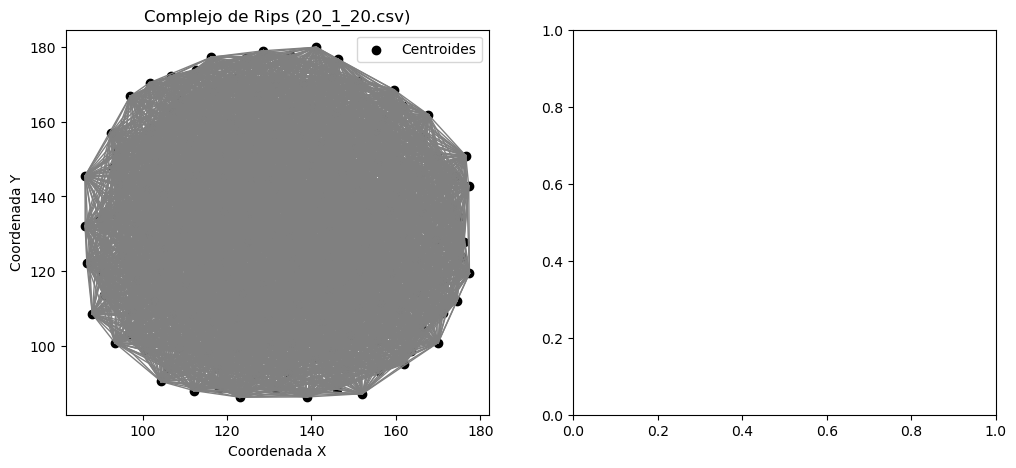

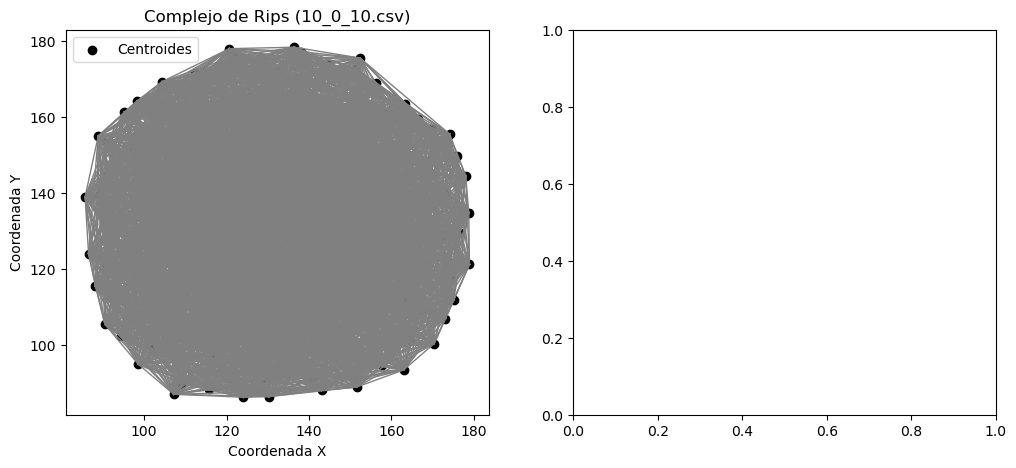

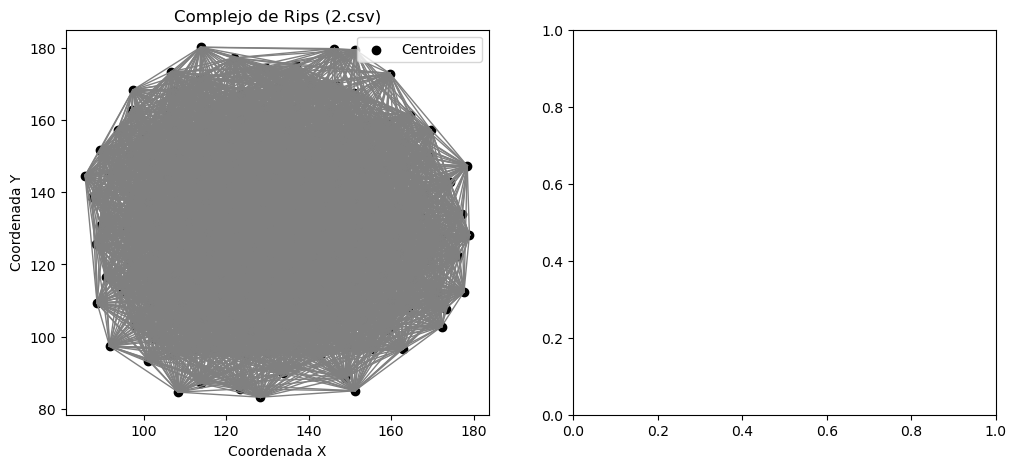

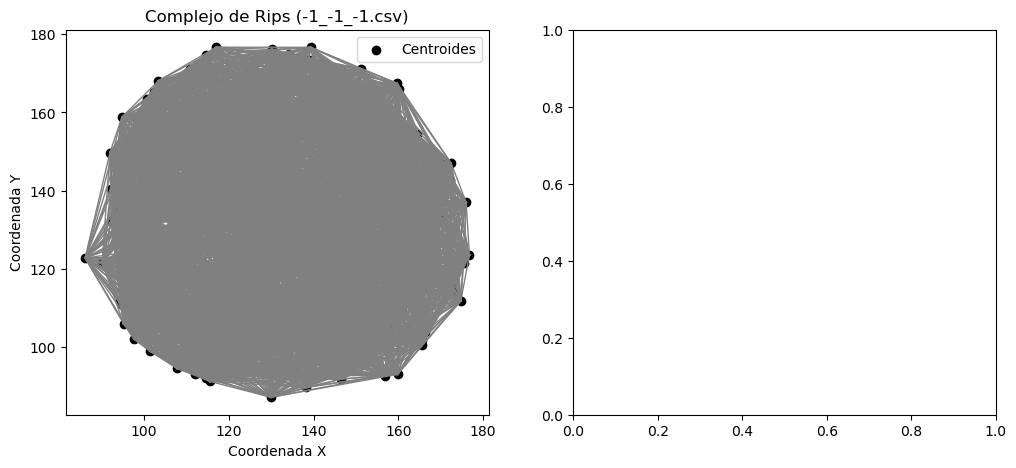

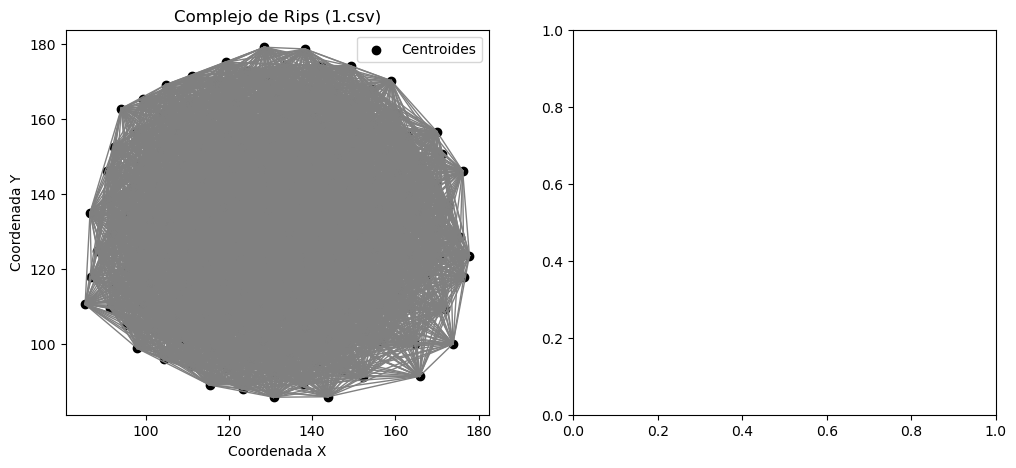

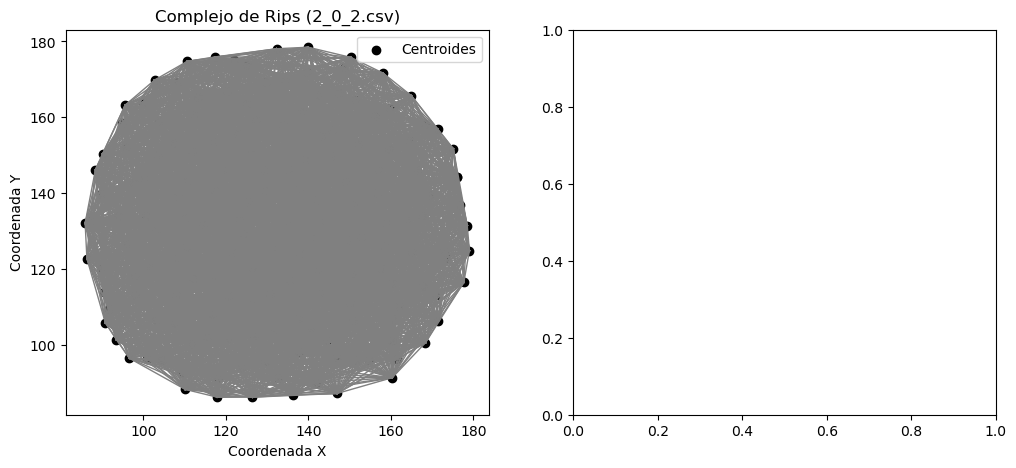

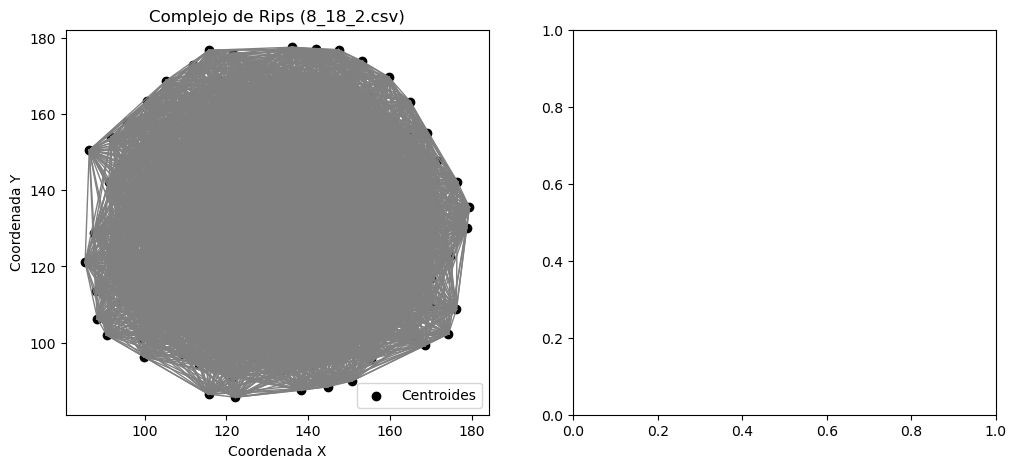

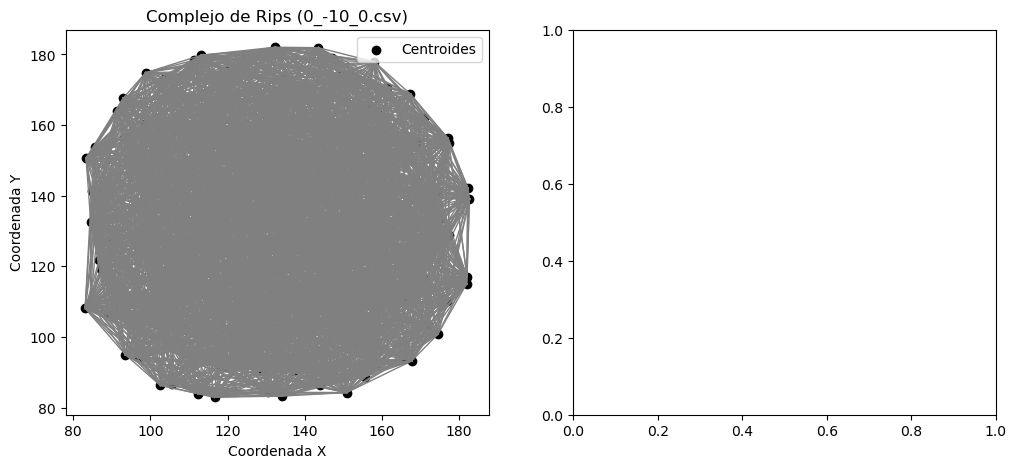

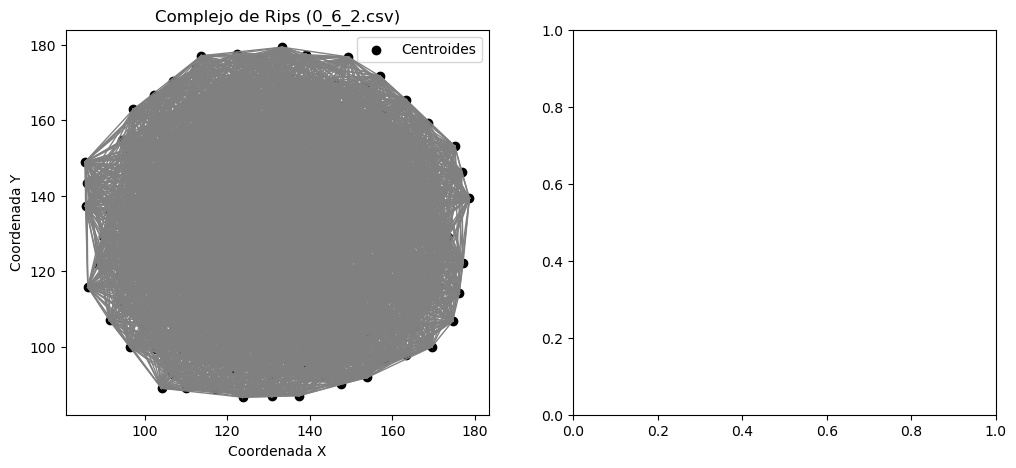

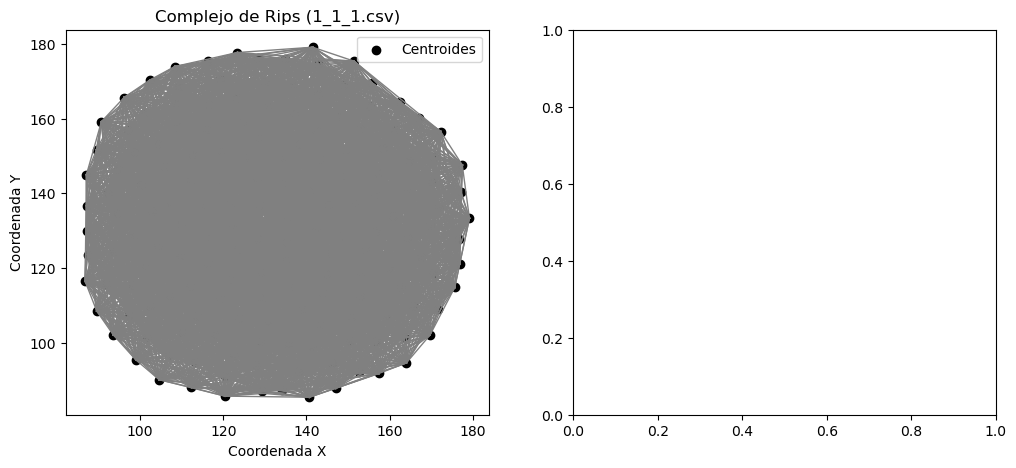

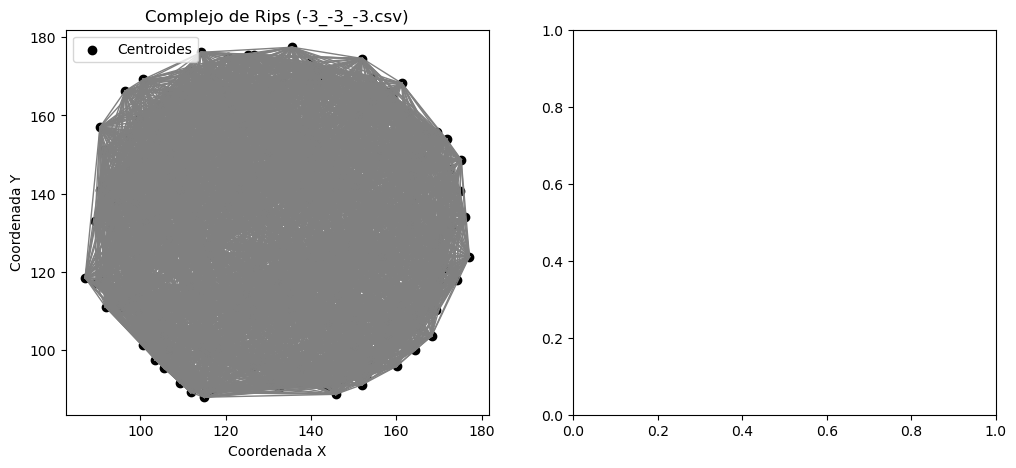

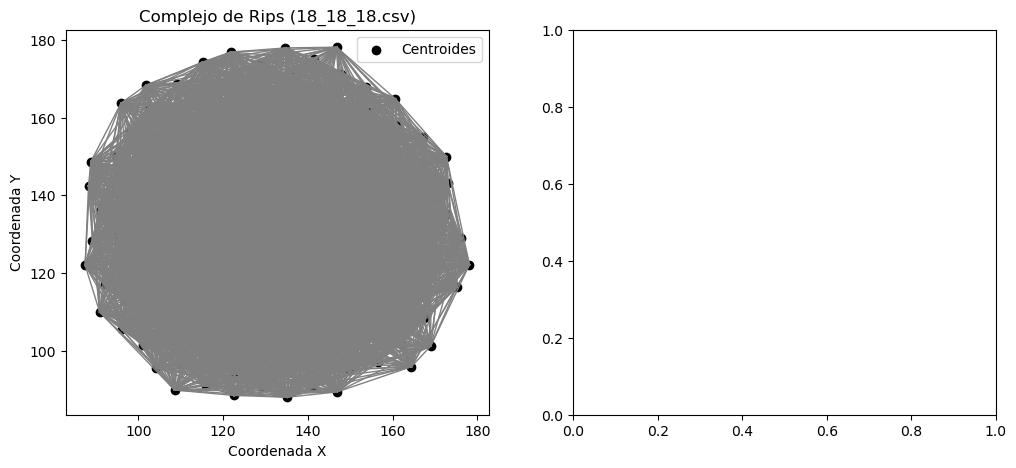

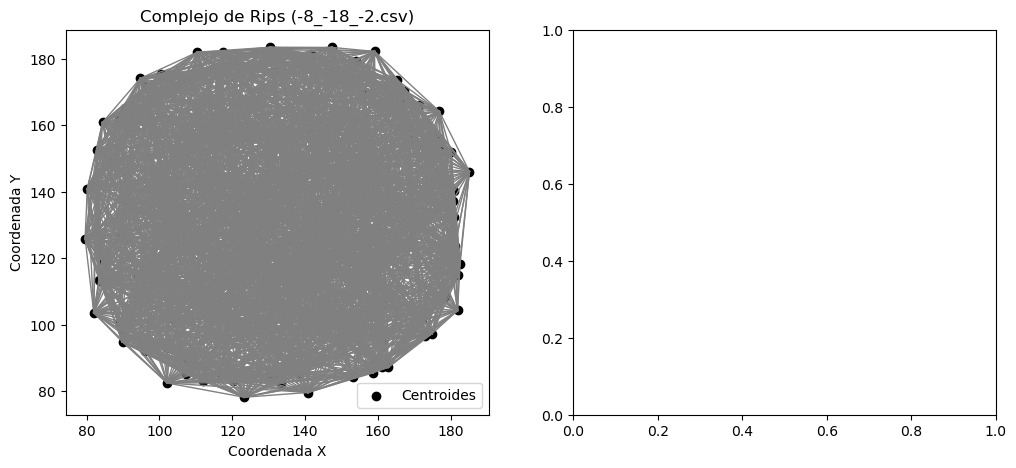

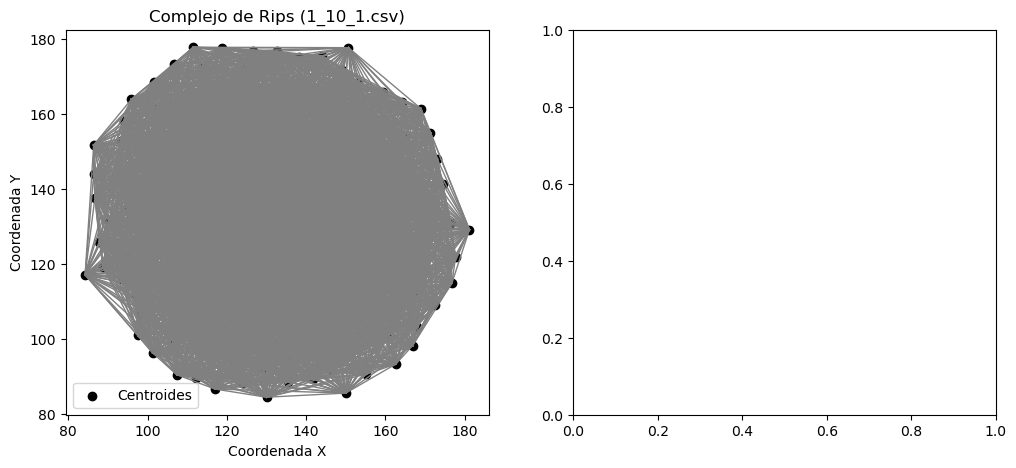

In [79]:
calcular_rips_y_persistencia("/home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides")

In [84]:
calcular_distancia_bottleneck('/home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia')

Distancia de Bottleneck (Dimensión 1) para 1_20_20.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 1_20_20.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 2_2_2.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 2_2_2.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -3_0_-3.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -3_0_-3.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 20_1_1.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 20_1_1.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 10_10_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 10_10_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 20_20_1.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 20_20_1.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 0_10_6.csv es efectivamente

In [85]:
calcular_distancia_wasserstein('/home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia')

Distancia de Wasserstein (Dimensión 1) para 1_20_20.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 1_20_20.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 2_2_2.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 2_2_2.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para -3_0_-3.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para -3_0_-3.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 20_1_1.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 20_1_1.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 10_10_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 10_10_0.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 20_20_1.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 20_20_1.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 0_10_6.csv es 

In [86]:
distancias('/home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia')

Distancias (Dimensión 1) para 1_20_20.csv son efectivamente cero.
Distancias (Dimensión 0) para 1_20_20.csv son efectivamente cero.
Distancias (Dimensión 1) para 2_2_2.csv son efectivamente cero.
Distancias (Dimensión 0) para 2_2_2.csv son efectivamente cero.
Distancias (Dimensión 1) para -3_0_-3.csv son efectivamente cero.
Distancias (Dimensión 0) para -3_0_-3.csv son efectivamente cero.
Distancias (Dimensión 1) para 20_1_1.csv son efectivamente cero.
Distancias (Dimensión 0) para 20_1_1.csv son efectivamente cero.
Distancias (Dimensión 1) para 10_10_0.csv son efectivamente cero.
Distancias (Dimensión 0) para 10_10_0.csv son efectivamente cero.
Distancias (Dimensión 1) para 20_20_1.csv son efectivamente cero.
Distancias (Dimensión 0) para 20_20_1.csv son efectivamente cero.
Distancias (Dimensión 1) para 0_10_6.csv son efectivamente cero.
Distancias (Dimensión 0) para 0_10_6.csv son efectivamente cero.
Distancias (Dimensión 1) para 0_20_2.csv son efectivamente cero.
Distancias (Dimensi

In [87]:
ruta_directorio = '/home/jupyter-user5/multicellularity_patterns_classification-/carpeta_datos/carpeta_csv/centroides/persistencia/distancias/'
crear_visualizaciones(ruta_directorio)


/opt/conda/envs/TDA/lib/python3.7/site-packages/seaborn/matrix.py:531: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


Las visualizaciones se han creado y guardado en la carpeta 'visualizacion'.


In [88]:
#prueba unir todo

In [120]:
def ejecutar_pipeline(ruta_directorio_base):
    # Calcular y guardar los centroides
    ruta_centroides = calcular_y_guardar_centroides(ruta_directorio_base)
    
    # Calcular Rips y persistencia
    ruta_persistencia = calcular_rips_y_persistencia(ruta_centroides)
    
    # Calcular la distancia de Bottleneck
    ruta_bottleneck = calcular_distancia_bottleneck(ruta_persistencia)
    
    # Calcular la distancia de Wasserstein
    ruta_wasserstein = calcular_distancia_wasserstein(ruta_persistencia)
    
    # Calcular distancias adicionales si es necesario
    ruta_distancias = distancias(ruta_persistencia)
    

Centroides y gráfico guardados para 0_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv/centroides.
Centroides y gráfico guardados para 1_1_1.csv en /home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv/centroides.
Gráfico de Rips y diagrama de persistencia guardados para 0_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv/centroides/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 1_1_1.csv en /home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv/centroides/persistencia.
Distancia de Bottleneck (Dimensión 1) para 0_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 0_0_0.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 1_1_1.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 1_1_1.csv es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 0_0_0.csv es e

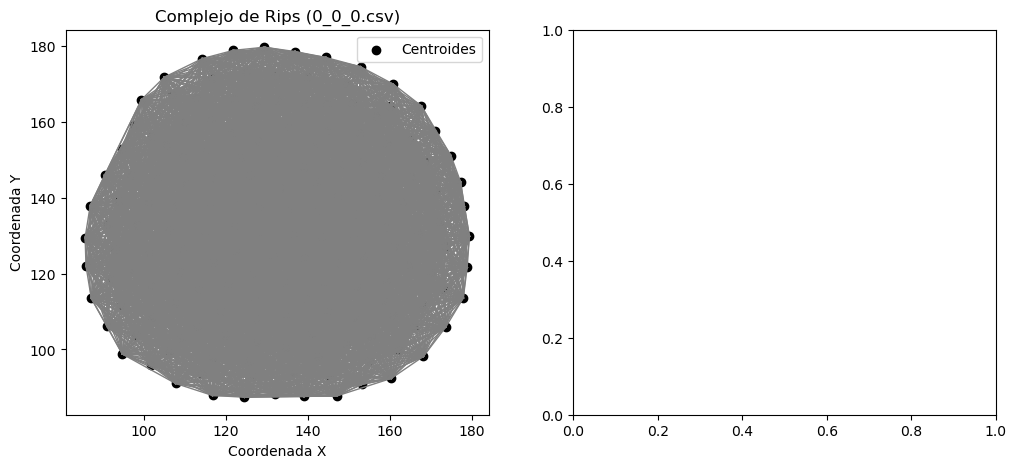

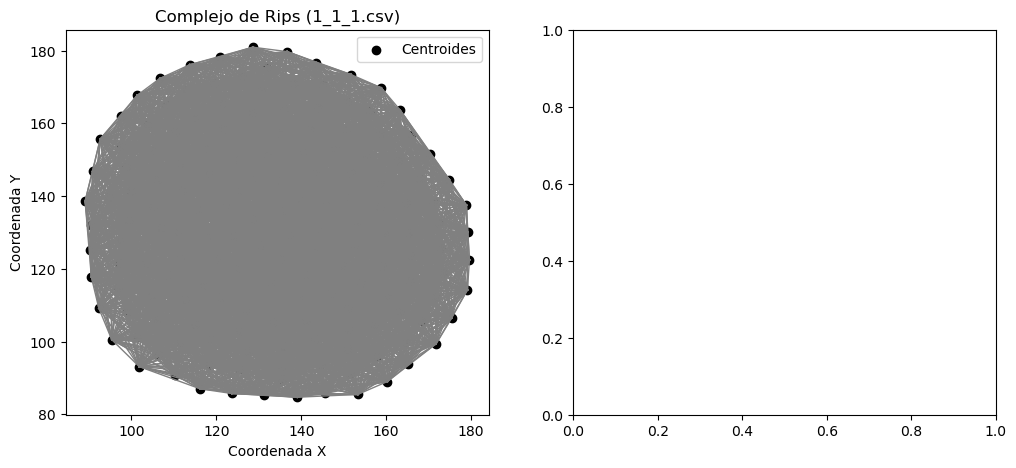

In [121]:
ejecutar_pipeline("/home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv")

In [123]:
crear_visualizaciones('/home/jupyter-user5/multicellularity_patterns_classification-/1-100/centroides/persistencia/distancias/)


SyntaxError: EOL while scanning string literal (1308460809.py, line 1)

In [125]:
#############################DBSCAN

In [155]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def aplicar_dbscan_a_distancias(input_folder, eps=1.0, min_samples=5, output_folder="resultados_cluster"):
    # Crear la carpeta de salida si no existe
    os.makedirs(output_folder, exist_ok=True)
    
    # Iterar sobre todos los archivos CSV en la carpeta de entrada
    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):
            input_file = os.path.join(input_folder, filename)
            
            # Cargar la matriz de distancias
            df = pd.read_csv(input_file, index_col=0)
            distancias = df.values

            # Escalar los datos para mejorar el rendimiento de DBSCAN
            scaler = StandardScaler()
            distancias_scaled = scaler.fit_transform(distancias)

            # Aplicar DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
            labels = dbscan.fit_predict(distancias_scaled)

            # Número de clusters encontrados
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            print(f"Número de clústeres encontrados en {filename}: {num_clusters}")

            # Guardar los resultados
            resultados = pd.DataFrame({'Archivo': df.index, 'Cluster': labels})
            output_file = os.path.join(output_folder, f"clusters_{filename}")
            resultados.to_csv(output_file, index=False)

            # Graficar los clusters encontrados
            plt.figure(figsize=(10, 8))
            unique_labels = set(labels)
            
            for k in unique_labels:
                class_member_mask = (labels == k)
                xy = distancias[class_member_mask]
                plt.plot(np.where(class_member_mask)[0], distancias[class_member_mask, class_member_mask], 
                         'o', markerfacecolor='black' if k == -1 else plt.cm.Spectral(float(k) / num_clusters))
            
            plt.title(f"Clustering DBSCAN para {filename}")
            plt.xlabel("Índice")
            plt.ylabel("Distancia")
            plt.savefig(os.path.join(output_folder, f"grafico_clusters_{filename}.png"))
          




Número de clústeres encontrados en distancias_bottleneck_dim0.csv: 1
Número de clústeres encontrados en distancias_wasserstein_dim1.csv: 2
Número de clústeres encontrados en distancias_wasserstein_dim0.csv: 2
Número de clústeres encontrados en distancias_bottleneck_dim1.csv: 2


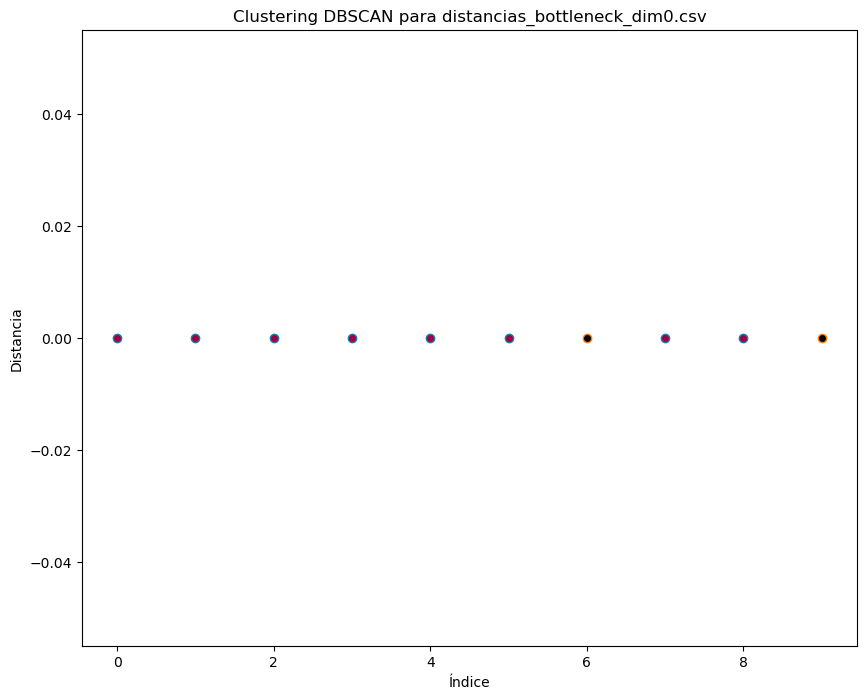

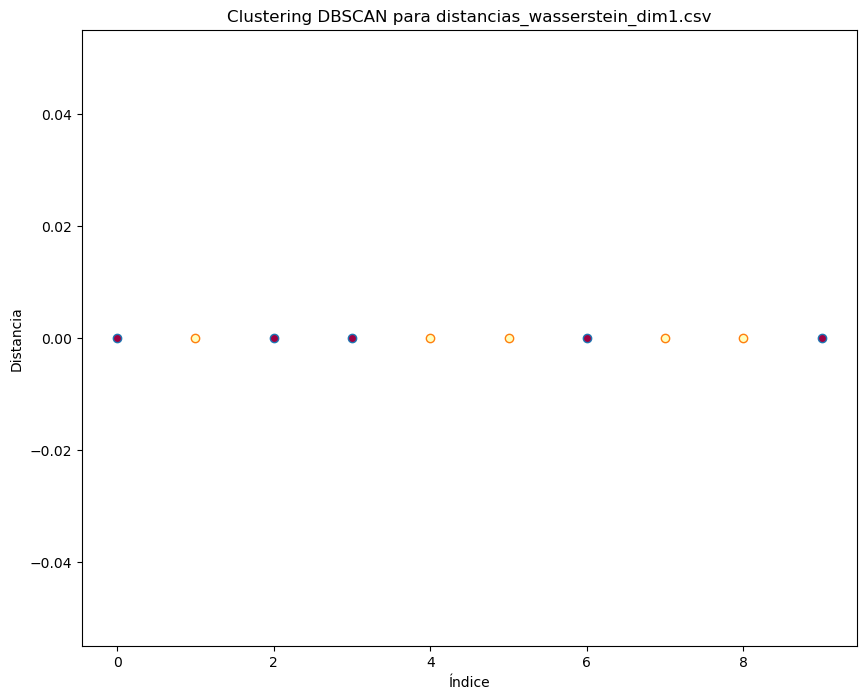

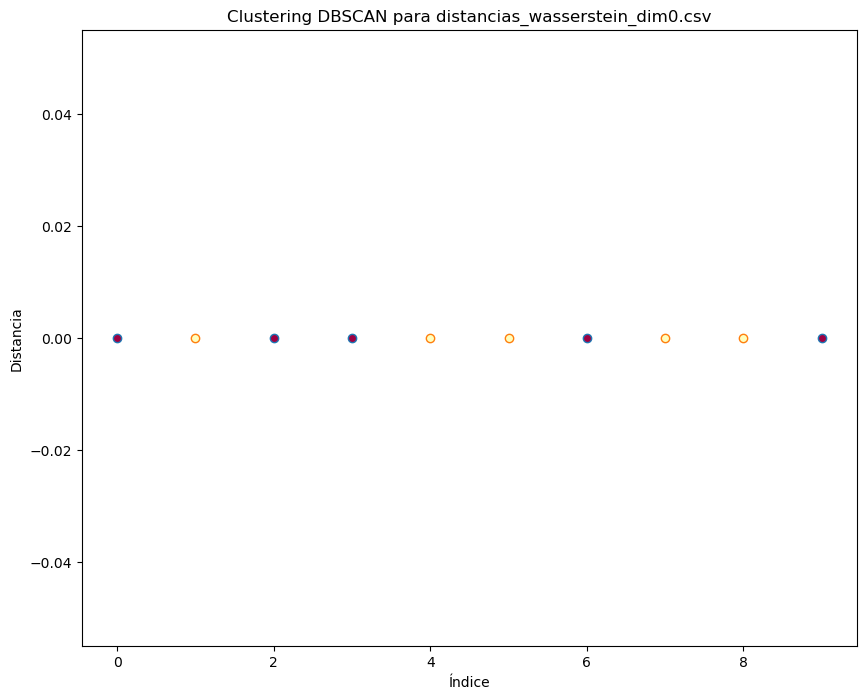

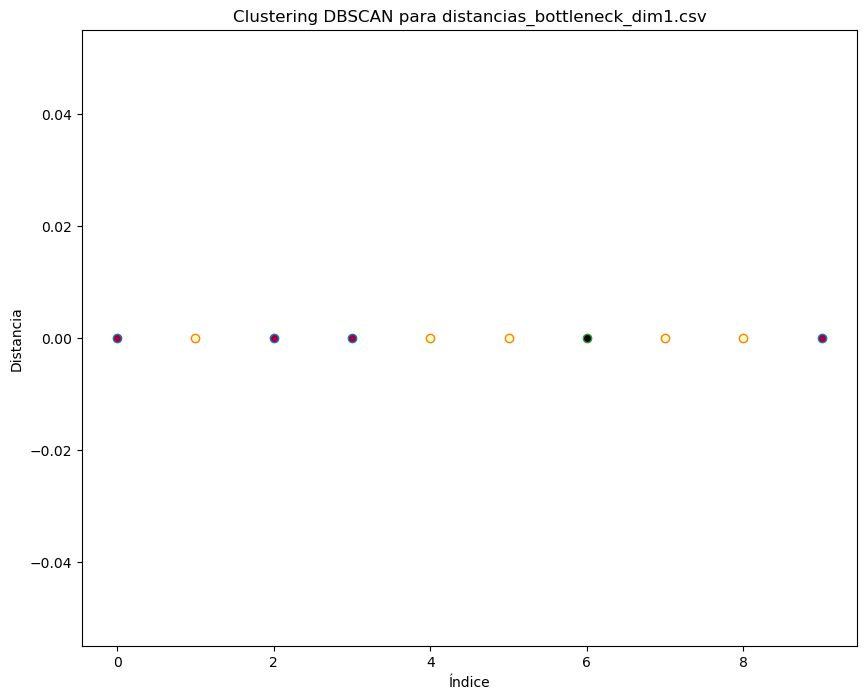

In [160]:
aplicar_dbscan_a_distancias(
    input_folder="/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia/distancias",
    eps=4.0,
    min_samples=3,
    output_folder="resultados_cluster"
)

In [163]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def aplicar_dbscan_a_distancias(input_folder, eps=1.0, min_samples=5):
    # Crear la carpeta de salida en la misma dirección que la carpeta de entrada
    output_folder = os.path.join(input_folder, "resultados_cluster")
    os.makedirs(output_folder, exist_ok=True)

    # Inicializar una lista para almacenar todos los resultados
    todos_resultados = []

    # Iterar sobre todos los archivos CSV en la carpeta de entrada
    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):
            input_file = os.path.join(input_folder, filename)
            
            # Cargar la matriz de distancias
            df = pd.read_csv(input_file, index_col=0)
            distancias = df.values

            # Escalar los datos para mejorar el rendimiento de DBSCAN
            scaler = StandardScaler()
            distancias_scaled = scaler.fit_transform(distancias)

            # Aplicar DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
            labels = dbscan.fit_predict(distancias_scaled)

            # Número de clusters encontrados
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            print(f"Número de clústeres encontrados en {filename}: {num_clusters}")

            # Guardar los resultados en una lista
            resultados = pd.DataFrame({'Archivo': df.index, 'Cluster': labels})
            resultados['NombreArchivo'] = filename  # Agregar el nombre del archivo
            todos_resultados.append(resultados)

            # Graficar los clusters encontrados
            plt.figure(figsize=(10, 8))
            unique_labels = set(labels)
            
            for k in unique_labels:
                class_member_mask = (labels == k)
                xy = distancias[class_member_mask]
                plt.plot(np.where(class_member_mask)[0], distancias[class_member_mask, class_member_mask], 
                         'o', markerfacecolor='black' if k == -1 else plt.cm.Spectral(float(k) / num_clusters))
            
            plt.title(f"Clustering DBSCAN para {filename}")
            plt.xlabel("Índice")
            plt.ylabel("Distancia")
            plt.savefig(os.path.join(output_folder, f"grafico_clusters_{filename}.png"))
            plt.close()  # Cerrar la figura para liberar memoria

    # Concatenar todos los resultados en un solo DataFrame
    resultados_finales = pd.concat(todos_resultados, ignore_index=True)
    output_file_final = os.path.join(output_folder, "todos_resultados_clusters.csv")
    resultados_finales.to_csv(output_file_final, index=False)

    print(f"Resultados completos guardados en: {output_file_final}")

# Llama a la función pasando el directorio que contiene los archivos CSV y tus parámetros
aplicar_dbscan_a_distancias(
    input_folder="/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia/distancias",
    eps=0.,  # Ejemplo de parámetro
    min_samples=3  # Ejemplo de parámetro
)


Número de clústeres encontrados en distancias_bottleneck_dim0.csv: 0
Número de clústeres encontrados en distancias_wasserstein_dim1.csv: 0
Número de clústeres encontrados en distancias_wasserstein_dim0.csv: 0
Número de clústeres encontrados en distancias_bottleneck_dim1.csv: 0
Resultados completos guardados en: /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides/persistencia/distancias/resultados_cluster/todos_resultados_clusters.csv


In [6]:
#Visualizacion nuevos datos admin 

In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

def encontrar_clusters_maximos_tabla(ruta_distancias, epsilon_min=0.01, epsilon_max=4.0, paso=0.01):
    """
    Encuentra el mayor número de clusters posibles usando DBSCAN y genera tablas con los resultados.

    Parámetros:
    ruta_distancias (str): Ruta al directorio que contiene las matrices de distancias.
    epsilon_min (float): Valor mínimo para epsilon.
    epsilon_max (float): Valor máximo para epsilon.
    paso (float): Incremento entre valores consecutivos de epsilon.

    Retorno:
    dict: Un diccionario con las tablas generadas para cada métrica.
    """
    # Cargar las matrices de distancias
    archivos_distancias = {
        "bottleneck_dim1": "distancias_bottleneck_dim1.csv",
        "bottleneck_dim0": "distancias_bottleneck_dim0.csv",
        "wasserstein_dim1": "distancias_wasserstein_dim1.csv",
        "wasserstein_dim0": "distancias_wasserstein_dim0.csv"
    }
    
    resultados = {}

    for clave, archivo in archivos_distancias.items():
        # Leer la matriz de distancias
        ruta_archivo = os.path.join(ruta_distancias, archivo)
        matriz_distancias = pd.read_csv(ruta_archivo, index_col=0).to_numpy()
        nombres_archivos = pd.read_csv(ruta_archivo, index_col=0).index.tolist()
        
        max_clusters = 0
        mejor_epsilon = None
        mejores_labels = None
        
        # Explorar diferentes valores de epsilon
        for epsilon in np.arange(epsilon_min, epsilon_max, paso):
            clustering = DBSCAN(eps=epsilon, metric="precomputed", min_samples=2).fit(matriz_distancias)
            labels = clustering.labels_
            
            # Contar clusters (excluyendo ruido, representado por -1)
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            if num_clusters > max_clusters:
                max_clusters = num_clusters
                mejor_epsilon = epsilon
                mejores_labels = labels

        # Crear tabla con resultados
        tabla_resultados = pd.DataFrame({
            "Archivo": nombres_archivos,
            "Cluster": mejores_labels
        }).sort_values(by="Cluster")

        resultados[clave] = {
            "epsilon": mejor_epsilon,
            "clusters": max_clusters,
            "tabla": tabla_resultados
        }

        # Guardar la tabla como CSV
        nombre_csv = f"clusters_{clave}.csv"
        tabla_resultados.to_csv(os.path.join(ruta_distancias, nombre_csv), index=False)
        print(f"Resultados de {clave} guardados en {nombre_csv}")

    return resultados

# Ruta al directorio que contiene las distancias
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/1-100/centroides/persistencia/distancias/"

# Llamar a la función
resultados_clusters = encontrar_clusters_maximos_tabla(ruta_directorio)

# Mostrar resultados
for clave, resultado in resultados_clusters.items():
    print(f"Métrica: {clave}")
    print(f"  Mejor epsilon: {resultado['epsilon']}")
    print(f"  Máximo número de clusters: {resultado['clusters']}")
    print("Tabla de clusters:")
    print(resultado["tabla"].head())  # Mostrar primeras filas de la tabla


Resultados de bottleneck_dim1 guardados en clusters_bottleneck_dim1.csv
Resultados de bottleneck_dim0 guardados en clusters_bottleneck_dim0.csv
Resultados de wasserstein_dim1 guardados en clusters_wasserstein_dim1.csv
Resultados de wasserstein_dim0 guardados en clusters_wasserstein_dim0.csv
Métrica: bottleneck_dim1
  Mejor epsilon: 0.52
  Máximo número de clusters: 12
Tabla de clusters:
                                       Archivo  Cluster
55      sim 0_10_100_100_1000 - step_10000.csv       -1
65       sim 0_10_0_100000_10 - step_10000.csv       -1
64  sim 0_10_0_100000_1000000 - step_10000.csv       -1
63       sim 0_10_0_1000_1000 - step_10000.csv       -1
62       sim 0_10_0_1000000_0 - step_10000.csv       -1
Métrica: bottleneck_dim0
  Mejor epsilon: 0.54
  Máximo número de clusters: 10
Tabla de clusters:
                                     Archivo  Cluster
57       sim 0_10_10_100_10 - step_10000.csv       -1
61     sim 0_10_10_100_1000 - step_10000.csv       -1
83  sim 0_10_1

/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1858: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


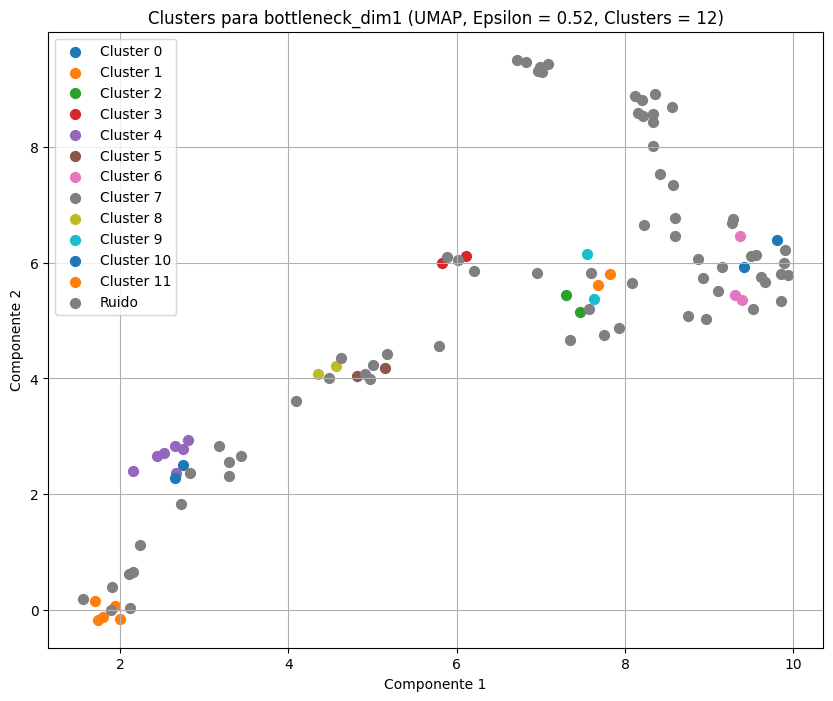

Gráfico guardado como clusters_umap_bottleneck_dim1.png


/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1858: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


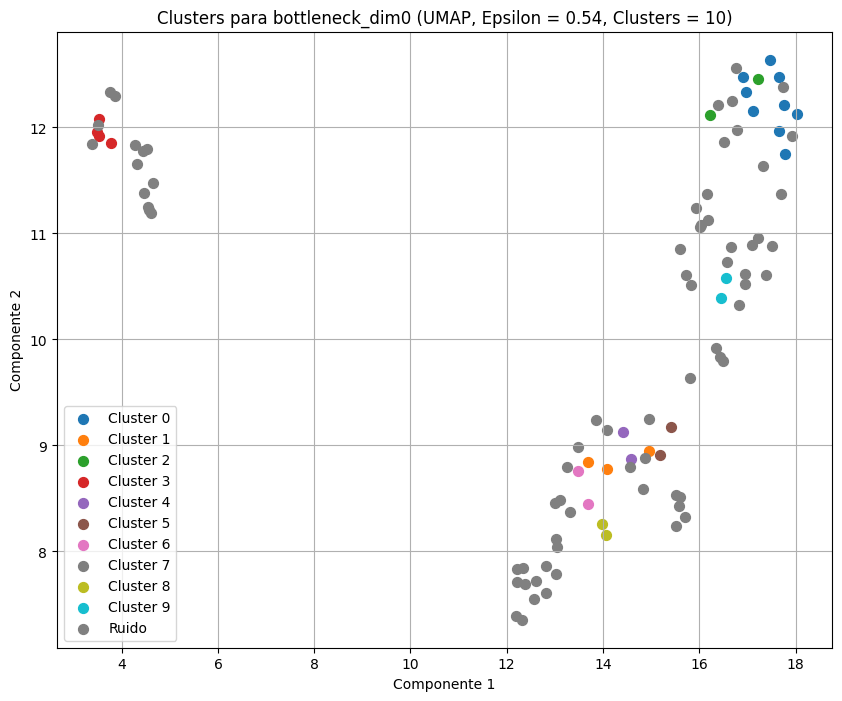

Gráfico guardado como clusters_umap_bottleneck_dim0.png


/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1858: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


TypeError: 'NoneType' object is not iterable

<Figure size 1000x800 with 0 Axes>

In [15]:
import umap.umap_ as umap

def visualizar_clusters_umap(ruta_distancias, epsilon_min=0.01, epsilon_max=2.0, paso=0.01):
    archivos_distancias = {
        "bottleneck_dim1": "distancias_bottleneck_dim1.csv",
        "bottleneck_dim0": "distancias_bottleneck_dim0.csv",
        "wasserstein_dim1": "distancias_wasserstein_dim1.csv",
        "wasserstein_dim0": "distancias_wasserstein_dim0.csv"
    }

    for clave, archivo in archivos_distancias.items():
        # Cargar matriz de distancias
        ruta_archivo = os.path.join(ruta_distancias, archivo)
        matriz_distancias = pd.read_csv(ruta_archivo, index_col=0).to_numpy()
        nombres_archivos = pd.read_csv(ruta_archivo, index_col=0).index.tolist()

        max_clusters = 0
        mejor_epsilon = None
        mejores_labels = None

        # Explorar diferentes valores de epsilon
        for epsilon in np.arange(epsilon_min, epsilon_max, paso):
            clustering = DBSCAN(eps=epsilon, metric="precomputed", min_samples=2).fit(matriz_distancias)
            labels = clustering.labels_

            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            if num_clusters > max_clusters:
                max_clusters = num_clusters
                mejor_epsilon = epsilon
                mejores_labels = labels

        # Proyectar con UMAP
        reducer = umap.UMAP(n_components=2, metric="precomputed", random_state=42)
        puntos_2d = reducer.fit_transform(matriz_distancias)

        # Visualización
        plt.figure(figsize=(10, 8))
        for cluster in set(mejores_labels):
            if cluster == -1:
                plt.scatter(
                    puntos_2d[mejores_labels == cluster, 0],
                    puntos_2d[mejores_labels == cluster, 1],
                    s=50, c='gray', label='Ruido'
                )
            else:
                plt.scatter(
                    puntos_2d[mejores_labels == cluster, 0],
                    puntos_2d[mejores_labels == cluster, 1],
                    s=50, label=f'Cluster {cluster}'
                )

        plt.title(f'Clusters para {clave} (UMAP, Epsilon = {mejor_epsilon}, Clusters = {max_clusters})')
        plt.xlabel('Componente 1')
        plt.ylabel('Componente 2')
        plt.legend()
        plt.grid()

        plt.savefig(os.path.join(ruta_distancias, f"clusters_umap_{clave}.png"))
        plt.show()
        print(f"Gráfico guardado como clusters_umap_{clave}.png")

# Llamar a la función con UMAP
visualizar_clusters_umap(ruta_directorio)


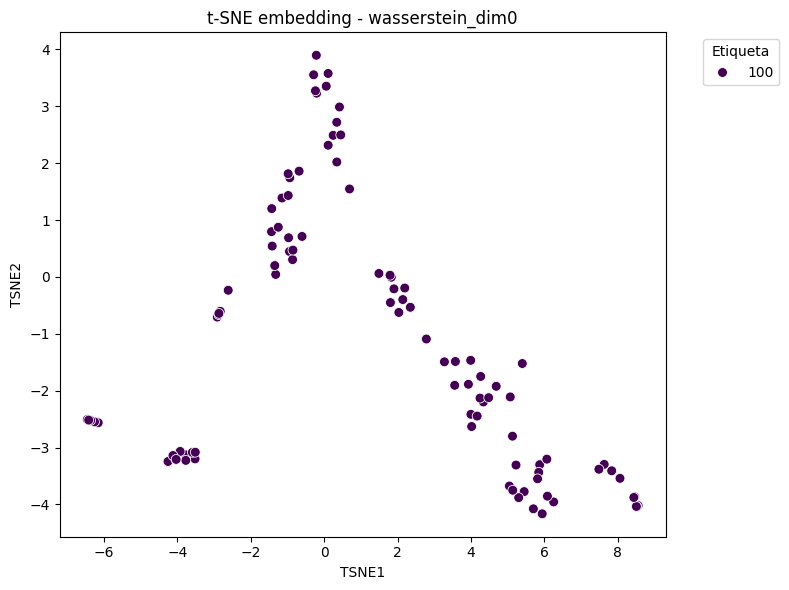

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Ruta del directorio con las distancias
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/1-100/centroides/persistencia/distancias/"
archivos_distancias = {
    "bottleneck_dim1": "distancias_bottleneck_dim1.csv",
    "bottleneck_dim0": "distancias_bottleneck_dim0.csv",
    "wasserstein_dim1": "distancias_wasserstein_dim1.csv",
    "wasserstein_dim0": "distancias_wasserstein_dim0.csv"
}

# Función para cargar matrices de distancias
def cargar_matriz_distancias(nombre_archivo):
    ruta_completa = os.path.join(ruta_directorio, nombre_archivo)
    matriz = pd.read_csv(ruta_completa, index_col=0)
    return matriz

# Elegir una métrica para analizar (ejemplo: Bottleneck Dim 1)
nombre_matriz = "wasserstein_dim0"  # Cambiar a la métrica deseada
matriz_distancias = cargar_matriz_distancias(archivos_distancias[nombre_matriz])

# Conversión a matriz NumPy si es necesario
matriz_distancias = matriz_distancias.values

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(metric="precomputed", random_state=42, perplexity=30, max_iter=1000, init="random")
embedding = tsne.fit_transform(matriz_distancias)

# Crear un DataFrame con los resultados
df_embedding = pd.DataFrame(embedding, columns=["TSNE1", "TSNE2"])
df_embedding["Etiqueta"] = matriz_distancias.shape[0]  # Si hay etiquetas, puedes agregarlas aquí

# Visualización inicial del embedding
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_embedding, x="TSNE1", y="TSNE2", hue="Etiqueta", palette="viridis", s=50)
plt.title(f"t-SNE embedding - {nombre_matriz}")
plt.legend(title="Etiqueta", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
